In [ ]:
#Session 33 -  ML Project 5 Application of Time Series by Sreedhara Jagatagar Sreenivasa

#Dataset Link 
#
#Import Folloing Libraries
#import pandas as pd 
#import numpy as np 
#import matplotlib.pyplot as plt 
#from pandas.tools.plotting import autocorrelation_plot 
#from statsmodels.graphics.tsaplots import plot_pacf 
#from statsmodels.tsa.arima_model import ARIMA, ARMAResults 
#import datetime 
#import sys 
#import seaborn as sns 
#import statsmodels 
#import statsmodels.stats.diagnostic as diag 
#from statsmodels.tsa.stattools import adfuller 
#from scipy.stats.mstats import normaltest 
 
#from matplotlib.pyplot import acorr 
#plt.style.use('fivethirtyeight') 
#%matplotlib inline 
#df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv') 
#df.head() 
 
 
#Problem Statement: 
#Pick up the following stocks and generate forecasts accordingly 
# Stocks: 
##1. NASDAQ.AAPL 
##2. NASDAQ.ADP 
#3. NASDAQ.CBOE 
#4. NASDAQ.CSCO 
#5. NASDAQ.EBAY 


# Import Libraries
# Load Data
# Analyze And Forecasts below stocks
    ## NASDAQ.AAPL 
    ## NASDAQ.ADP 
    ## NASDAQ.CBOE 
    ## NASDAQ.CSCO 
    ## NASDAQ.EBAY 

In [ ]:
#Import Libraries
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from sklearn.metrics import mean_squared_error 
from pandas.tools.plotting import autocorrelation_plot

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

#------
#Import Models
import pandas as pd
#from pandas import read_csv 
from pandas import datetime 
from matplotlib import pyplot 
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 
from pandas.tools.plotting import autocorrelation_plot

def parser(x): 
    return datetime.strptime("190"+x, "%Y-%m") 

In [3]:
#import Data
#df = pd.read_csv('C:/Users/Downloads/sp500/data_stocks.csv')

url='ml_cluster_project\data_stocks.csv'
df_stock=pd.read_csv(url, infer_datetime_format="date:\"%d-%b-%Y\"")
df_stock.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# NASDAQ.AAPL 
#### Analyze and generate forecasts 

In [6]:
#Only AAPL.AAPL data
df_NASDAQ_APPL=pd.DataFrame(df_stock[['DATE','NASDAQ.AAPL']])
df_NASDAQ_APPL.head(10)
df_NASDAQ_APPL.index=df_NASDAQ_APPL.DATE
df_NASDAQ_APPL.head(10)
df_NASDAQ_APPL.drop('DATE', axis=1, inplace=True)

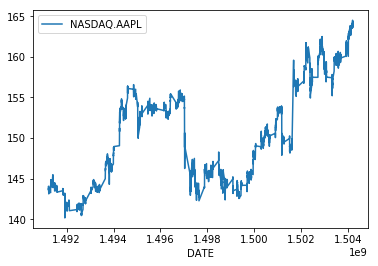

In [10]:
##Analyze the data and see whether Data is stationary or not
#fig = plt.figure(figsize=(20, 7))
df_NASDAQ_APPL.plot()
pyplot.show()

            NASDAQ.AAPL
DATE                   
1491226200     143.6800
1491226260     143.7000
1491226320     143.6901
1491226380     143.6400
1491226440     143.6600


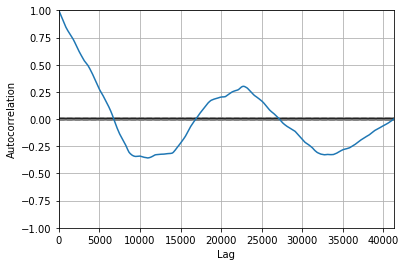

In [11]:
#Run Autocorrelation and decide on the parameter LAG parameter
print(df_NASDAQ_APPL.head(5))
autocorrelation_plot(df_NASDAQ_APPL)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               39230.690
Method:                       css-mle   S.D. of innovations              0.094
Date:                Wed, 30 Jan 2019   AIC                         -78447.380
Time:                        14:03:06   BIC                         -78386.985
Sample:                             1   HQIC                        -78428.291
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      1.113      0.266      -0.000       0.001
ar.L1.D.NASDAQ.AAPL    -0.0102      0.005     -2.082      0.037      -0.020      -0.001
ar.L2.D.NASDAQ.A

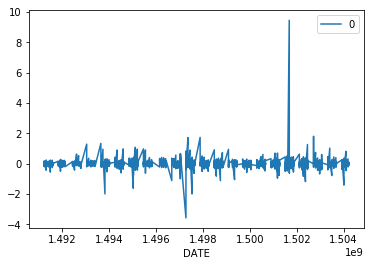

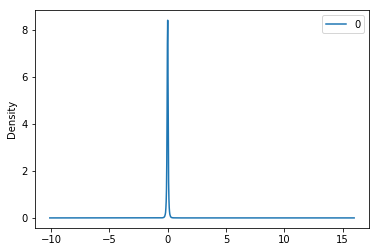

 
                  0
count  4.126500e+04
mean   1.960736e-08
std    9.351553e-02
min   -3.574548e+00
25%   -3.101367e-02
50%    7.835909e-05
75%    3.138983e-02
max    9.464882e+00


In [12]:
# fit model the using ARIMA and Analyze the same
model = ARIMA(df_NASDAQ_APPL, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print(' ')

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(' ')
print(residuals.describe())

 
Test MSE: 0.002
 
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.


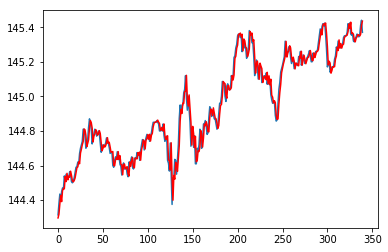

In [23]:
#Split the train and test and Forecast using ARIMA Model
X = df_NASDAQ_APPL.values

X=X[:1000] # take only 1000 values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print(test)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
print(' ')
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(' ')
# plot
print('A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# NASDAQ.ADP 
#### Analyze and generate forecasts  


In [25]:
#Only ADP data
df_NASDAQ_ADP=pd.DataFrame(df_stock[['DATE','NASDAQ.ADP']])
df_NASDAQ_ADP.head(10)
df_NASDAQ_ADP.index=df_NASDAQ_ADP.DATE
df_NASDAQ_ADP.head(10)
df_NASDAQ_ADP.drop('DATE', axis=1, inplace=True)

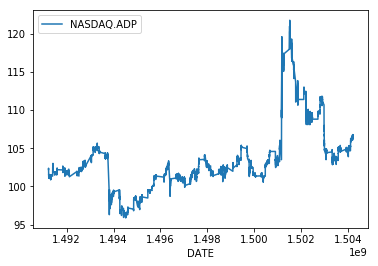

In [26]:
##Analyze the data and see whether Data is stationary or not
#fig = plt.figure(figsize=(20, 7))
df_NASDAQ_ADP.plot()
pyplot.show()

            NASDAQ.ADP
DATE                  
1491226200    102.2300
1491226260    102.1400
1491226320    102.2125
1491226380    102.1400
1491226440    102.0600


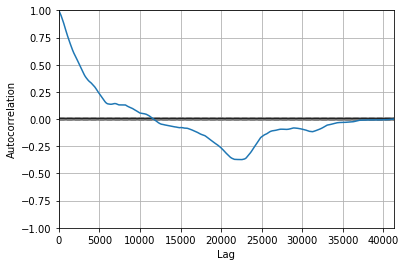

In [27]:
#Run Autocorrelation and decide on the parameter LAG parameter
print(df_NASDAQ_ADP.head(5))
autocorrelation_plot(df_NASDAQ_ADP)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:           D.NASDAQ.ADP   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               48794.235
Method:                       css-mle   S.D. of innovations              0.074
Date:                Wed, 30 Jan 2019   AIC                         -97574.470
Time:                        14:43:51   BIC                         -97514.076
Sample:                             1   HQIC                        -97555.381
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0001      0.000      0.272      0.785      -0.001       0.001
ar.L1.D.NASDAQ.ADP     0.0581      0.005     11.794      0.000       0.048       0.068
ar.L2.D.NASDAQ.ADP  

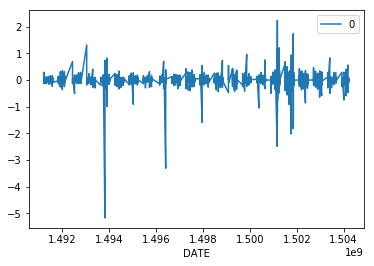

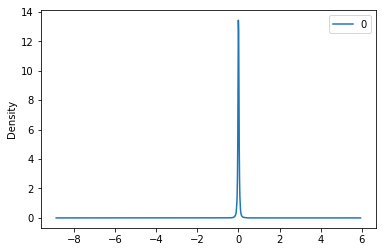

 
                  0
count  4.126500e+04
mean   1.498658e-07
std    7.417064e-02
min   -5.167771e+00
25%   -1.944322e-02
50%    7.823767e-05
75%    1.992544e-02
max    2.236279e+00


In [28]:
# fit model the using ARIMA and Analyze the same
model = ARIMA(df_NASDAQ_ADP, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print(' ')

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(' ')
print(residuals.describe())

 
Test MSE: 0.001
 
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.


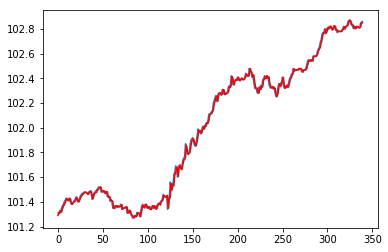

In [29]:
#Split the train and test and Forecast using ARIMA Model
X = df_NASDAQ_ADP.values

X=X[:1000] # take only 1000 values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print(test)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
print(' ')
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(' ')
# plot
print('A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# NASDAQ.CBOE 
#### Analyze and generate forecasts 

In [30]:
#Only ADP data
df_NASDAQ_CBOE=pd.DataFrame(df_stock[['DATE','NASDAQ.CBOE']])
df_NASDAQ_CBOE.head(10)
df_NASDAQ_CBOE.index=df_NASDAQ_CBOE.DATE
df_NASDAQ_CBOE.head(10)
df_NASDAQ_CBOE.drop('DATE', axis=1, inplace=True)

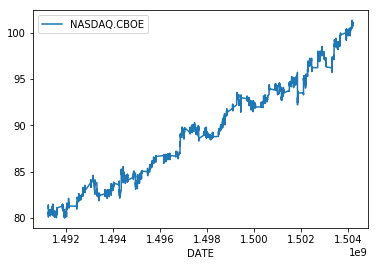

In [31]:
##Analyze the data and see whether Data is stationary or not
#fig = plt.figure(figsize=(20, 7))
df_NASDAQ_CBOE.plot()
pyplot.show()

            NASDAQ.CBOE
DATE                   
1491226200        81.03
1491226260        81.21
1491226320        81.21
1491226380        81.13
1491226440        81.12


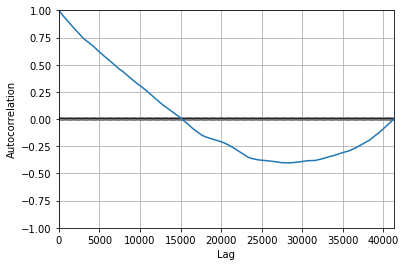

In [32]:
#Run Autocorrelation and decide on the parameter LAG parameter
print(df_NASDAQ_CBOE.head(5))
autocorrelation_plot(df_NASDAQ_CBOE)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CBOE   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               68168.215
Method:                       css-mle   S.D. of innovations              0.046
Date:                Wed, 30 Jan 2019   AIC                        -136322.431
Time:                        14:49:20   BIC                        -136262.036
Sample:                             1   HQIC                       -136303.342
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      2.532      0.011       0.000       0.001
ar.L1.D.NASDAQ.CBOE    -0.0810      0.005    -16.454      0.000      -0.091      -0.071
ar.L2.D.NASDAQ.C

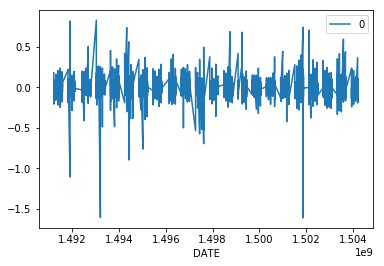

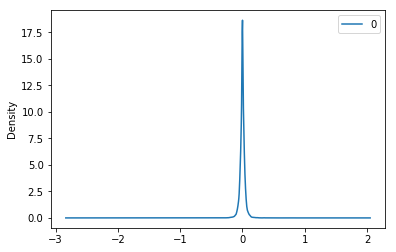

 
                  0
count  4.126500e+04
mean   7.209175e-07
std    4.638000e-02
min   -1.615220e+00
25%   -1.751801e-02
50%   -1.242675e-04
75%    1.804047e-02
max    8.291395e-01


In [33]:
# fit model the using ARIMA and Analyze the same
model = ARIMA(df_NASDAQ_CBOE, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print(' ')

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(' ')
print(residuals.describe())

 
Test MSE: 0.001
 
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.


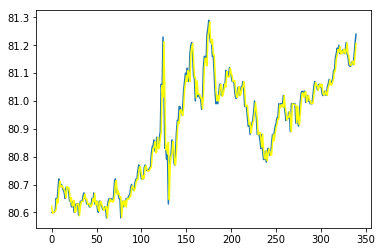

In [34]:
#Split the train and test and Forecast using ARIMA Model
X = df_NASDAQ_CBOE.values

X=X[:1000] # take only 1000 values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print(test)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
print(' ')
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(' ')
# plot
print('A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.')
pyplot.plot(test)
pyplot.plot(predictions, color='yellow')
pyplot.show()

# NASDAQ.CSCO 
#### Analyze and generate forecasts 

In [35]:
#Only ADP CSCO
df_NASDAQ_CSCO=pd.DataFrame(df_stock[['DATE','NASDAQ.CSCO']])
df_NASDAQ_CSCO.head(10)
df_NASDAQ_CSCO.index=df_NASDAQ_CSCO.DATE
df_NASDAQ_CSCO.head(10)
df_NASDAQ_CSCO.drop('DATE', axis=1, inplace=True)

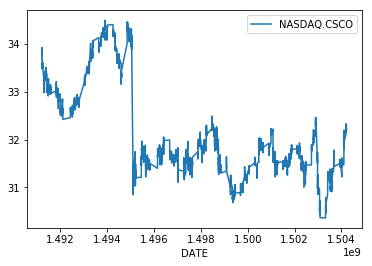

In [36]:
##Analyze the data and see whether Data is stationary or not
#fig = plt.figure(figsize=(20, 7))
df_NASDAQ_CSCO.plot()
pyplot.show()

            NASDAQ.CSCO
DATE                   
1491226200      33.7400
1491226260      33.8800
1491226320      33.9000
1491226380      33.8499
1491226440      33.8400


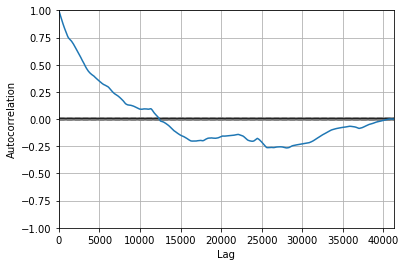

In [37]:
#Run Autocorrelation and decide on the parameter LAG parameter
print(df_NASDAQ_CSCO.head(5))
autocorrelation_plot(df_NASDAQ_CSCO)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CSCO   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood              100305.161
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 30 Jan 2019   AIC                        -200596.323
Time:                        14:54:57   BIC                        -200535.928
Sample:                             1   HQIC                       -200577.234
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.691e-05   9.82e-05     -0.376      0.707      -0.000       0.000
ar.L1.D.NASDAQ.CSCO     0.0166      0.005      3.380      0.001       0.007       0.026
ar.L2.D.NASDAQ.C

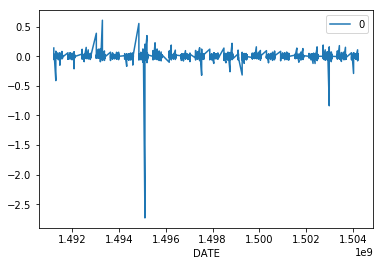

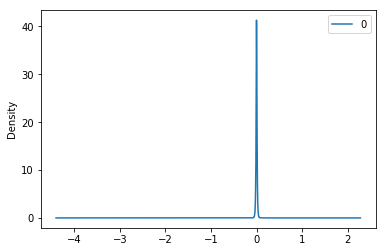

 
                  0
count  4.126500e+04
mean   1.787007e-07
std    2.128657e-02
min   -2.730452e+00
25%   -6.043830e-03
50%    9.572822e-05
75%    6.414385e-03
max    6.090701e-01


In [38]:
# fit model the using ARIMA and Analyze the same
model = ARIMA(df_NASDAQ_CSCO, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print(' ')

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(' ')
print(residuals.describe())

 
Test MSE: 0.000
 
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.


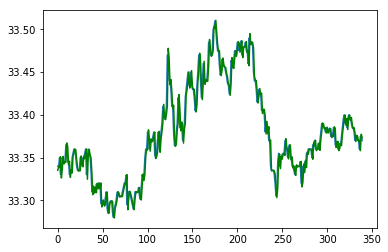

In [39]:
#Split the train and test and Forecast using ARIMA Model
X = df_NASDAQ_CSCO.values

X=X[:1000] # take only 1000 values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print(test)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
print(' ')
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(' ')
# plot
print('A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.')
pyplot.plot(test)
pyplot.plot(predictions, color='green')
pyplot.show()

# NASDAQ.EBAY 
#### Analyze and generate forecasts 

In [40]:
#Only ADP EBAY
df_NASDAQ_EBAY=pd.DataFrame(df_stock[['DATE','NASDAQ.EBAY']])
df_NASDAQ_EBAY.head(10)
df_NASDAQ_EBAY.index=df_NASDAQ_EBAY.DATE
df_NASDAQ_EBAY.head(10)
df_NASDAQ_EBAY.drop('DATE', axis=1, inplace=True)

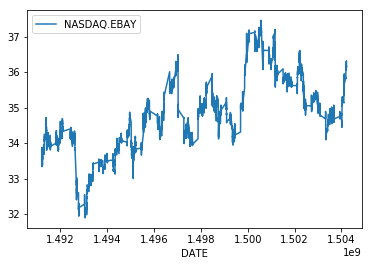

In [41]:
##Analyze the data and see whether Data is stationary or not
#fig = plt.figure(figsize=(20, 7))
df_NASDAQ_EBAY.plot()
pyplot.show()

            NASDAQ.CSCO
DATE                   
1491226200      33.7400
1491226260      33.8800
1491226320      33.9000
1491226380      33.8499
1491226440      33.8400


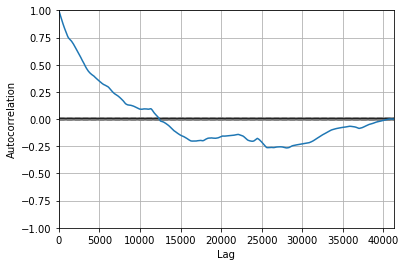

In [42]:
#Run Autocorrelation and decide on the parameter LAG parameter
print(df_NASDAQ_CSCO.head(5))
autocorrelation_plot(df_NASDAQ_CSCO)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CSCO   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood              100305.161
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 30 Jan 2019   AIC                        -200596.323
Time:                        14:58:25   BIC                        -200535.928
Sample:                             1   HQIC                       -200577.234
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.691e-05   9.82e-05     -0.376      0.707      -0.000       0.000
ar.L1.D.NASDAQ.CSCO     0.0166      0.005      3.380      0.001       0.007       0.026
ar.L2.D.NASDAQ.C

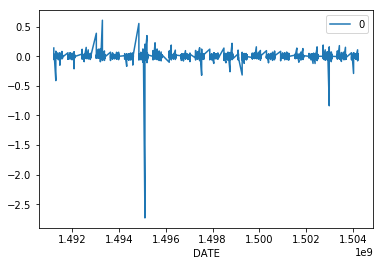

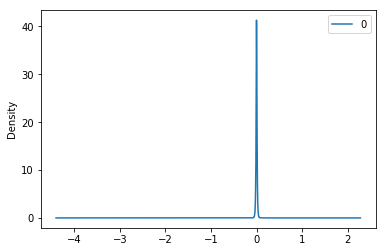

 
                  0
count  4.126500e+04
mean   1.787007e-07
std    2.128657e-02
min   -2.730452e+00
25%   -6.043830e-03
50%    9.572822e-05
75%    6.414385e-03
max    6.090701e-01


In [43]:
# fit model the using ARIMA and Analyze the same
model = ARIMA(df_NASDAQ_CSCO, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print(' ')

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(' ')
print(residuals.describe())

 
Test MSE: 0.000
 
A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.


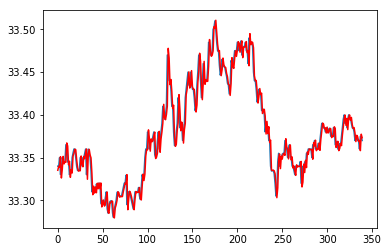

In [44]:
#Split the train and test and Forecast using ARIMA Model
X = df_NASDAQ_CSCO.values

X=X[:1000] # take only 1000 values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
#print(test)
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
print(' ')
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print(' ')
# plot
print('A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.')
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()